## Introduction
This tutorial will introduce you to some basic methods for object detection with opencv and pre-trained caffe models. We will not cover those algorithms or architectures here in this tutorial. Instead, we would just focus on some basic applications with these tools and algorithms. We've also provided some links to you if you are interested in the theoretical part.

### Tutorial content
In this tutorial, the tools we will use is [OpenCV](https://opencv.org/), [dlib](http://dlib.net/) and some pre-trained [caffe models](https://github.com/BVLC/caffe/wiki/Model-Zoo).

OpenCV (open source computer vision) is a library of functions for dealing with computer vision problems. It was first developed by Intel and later opened to the public. OpenCV is quite powerful. All of the features were written in C++, but Python, Java and MATLAB APIs are also available.

Dlib is also a C++ based open-source software library. It was published in the Journal of Machine Learning Research in 2009 and has been used in a wide range of domains since then. Dlib also provides Python APIs for its functions.

Finally, caffe (Convolutional Architecture for Fast Feature Embedding) is an open-source deep learning framework, originally developed at UC Berkeley. It is written in C++, with a Python interface. Caffe supports many different types of deep learning architectures, such as CNN, RCNN and LSTM. There are lots of pre-trained caffe models available online.


We will cover the following topics in this turtorial:
- [Installing the libraries](#Installing-the-libraries)
- [Basic operations on images in OpenCV](#Basic-operations-on-images-in-OpenCV)

- [Face detection](#Face-detection)
    - [face detection with Haar Cascades](#face-detection-with-Haar-Cascades)
    - [face detection with dlib](#face-detection-with-dlib)
- [General object detection with caffe models](#General-object-detection-with-caffe-models)
    - [object detection with GoogLeNet](#object-detection-with-GoogLeNet)
    - [Object detection with MobileNetSSD](#object-detection-with-MobileNetSSD)
- [Realtime application](#Realtime-application)
    - [realtime face detection with dlib](#realtime-face-detection-with-dlib)
    - [realtime object detection with MobileNetSSD](#realtime-object-detection-with-MobileNetSSD)
- [Reference](#Reference)

## Installing the libraries

Before getting start, let's install the libraries we will use first.

Firstly, Python's virtual environment is highly recommended for better organizing the various libraries in our machine. If you have installed anaconda, you can simply create a virtual environment by typing the following commands in the terminal:

    $ mkdir image_process
$ virtualenv image_process

Then, in order to activate the virtual environment, type the following command in terminal:
    
    $ source image_process/bin/activate

and `deactivate` command would help to get out of the virtual environment.

In order to use the jupyter notebook under the virtual environment, we need to install a new kernel under that environment as well. After we activate the virtual environment , type the following command in the terminal:

    $ pip install ipykernel
$ ipython kernel install --user --name=yourprojectname

Then, launch the jupyter notebook, you can choose to create a new project under the created kernel, or change the kernel of the existing project.

Finally, after activating the virtual environment, using `pip` to install OpenCV and dlib:

    $ pip install opencv-contrib-python
$ pip install dlib
    
On mac, there might come some GUI components issues when using dlib to change and show images. In order to let dlib display images, we need to install X11 first, and the process is quite complicated. So in this tutorial, we will just use dlib to do the detection, and use OpenCV to display the processed images.

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import dlib

In [2]:
work_dir = "./object-detection"

## Basic operations on images in OpenCV

Now that we've installed and loaded the libraries, let's load our first image and try to display it.<br>
In OpenCV, cv2.imread() is used to load and read the images. This function returns a numpy array and we can get the image size with the 'shape' attribute. In addition to the width and height information, the third value of the tuple indicates the number of the color channels in that image.

In [3]:
def read_image(img_name):
    # create the file path based on the given image name
    img_path = os.path.join(work_dir, "files", img_name)
    # read and returen the image
    return cv2.imread(img_path)

img_name = "aircraft.jpg"
img = read_image(img_name)
print(img.shape)

(240, 360, 3)


OpenCV itself has functions to display the images. We first used the cv2.imshow() function to create a window for the loaded image. The cv2.waitKey() function waits for some specific keyboard event. Then we used cv2.destroyAllWindows() function to close the image window.

In [4]:
def plot_img_by_cv2(img):
    # creat a window to display the image
    cv2.imshow(img_name, img)
    # when the attribute is 0, wait for any key from the keyboard
    cv2.waitKey(0)
    # close the window
    cv2.destroyAllWindows()

plot_img_by_cv2(img)

The result of the function shows as belows.

<img src="./object-detection/files/aircraft_display.png" width=400 align="left"/>

Since the image here is a numpy array, we can also use matplotlib to display it. But it's worth mentioning that the order of the color channels in OpenCV is blue, green, red. In order to use matplotlib to display the image, we need to change the order back to red, green, blue first. We can use `cv2.cvtColor(img, cv2.COLOR_BGR2RGB)` to change the channel order. We can also do it by first split the channels and then remerge them with the order we need.

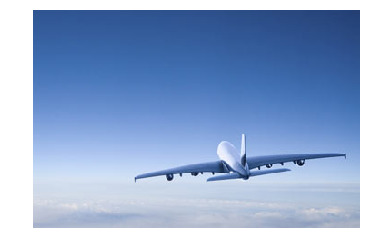

In [5]:
def plot_img_by_matplot(img):
    # split the image into b, g, r channels
    b, g, r = cv2.split(img)
    # create a new image with the r, g, b channel order
    copy_img = cv2.merge([r, g, b])
    # use plt to display the image
    plt.imshow(copy_img)
    plt.axis("off")
    plt.show()

plot_img_by_matplot(img)

## Face detection

After knowing some basic operations with the images, we can then do some interesting things. We will first use OpenCV to do the face detection.

### face detection with Haar Cascades

OpenCV comes with a trainer as well as detector. Users can train their own classifier for any objects. You can get more information about the [training](https://docs.opencv.org/3.3.0/dc/d88/tutorial_traincascade.html)  in OpenCV.
OpenCV also contains many pre-trained classifiers for faces, eyes, bodies and smiles. The classifiers are based on the [Haar Cascades](https://docs.opencv.org/3.4.1/d7/d8b/tutorial_py_face_detection.html). Here we will just use the pre-trained classifiers to detect the face and eyes in the given image.

Let us take a look at the image first. The result is showed as below. We created a rgb copy and a gray copy for the image. During the face detection, we will use these two copies as well. The rgb copy is for the final display while the gray copy is for face detection since we do not care the colors there.

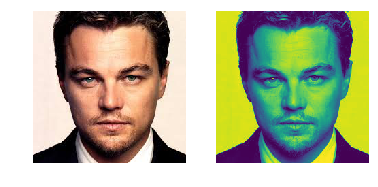

In [6]:
img = read_image("face.jpeg")
# change the channel of the image
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# change the colored image into a grayscale image
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
f, sub_plot = plt.subplots(1,2)
sub_plot[0].imshow(rgb_img)
sub_plot[0].axis("off")
sub_plot[1].imshow(gray_img)
sub_plot[1].axis("off")
plt.show()

Then we created a face detector and an eye detector with OpenCV's own XML classifiers. 
 Note that the path of the xml files need to be the full path here.

In [7]:
xml_dir = "/Users/yiyao/image_process/lib/python3.6/site-packages/cv2/data"
face_xml_path = os.path.join(xml_dir, "haarcascade_frontalface_default.xml")
eye_xml_path = os.path.join(xml_dir, "haarcascade_eye.xml")
face_cascade = cv2.CascadeClassifier(face_xml_path)
eye_cascade = cv2.CascadeClassifier(eye_xml_path)

The process of the face detection is simple. We first created a gray copy of the given image, and uses the face detector to get the positions of all the faces in the image. Within each face ROI, we used the eye detector to get the eyes' positions, and finally marked the face and the eyes separately with rectangles and ellipses.

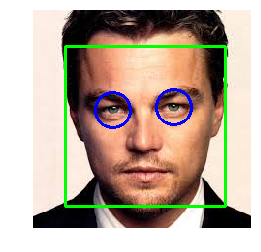

In [8]:
def face_detector_by_cv2(img):
    # get the copy of the img for marking the detection
    img_copy = img.copy()
    # get the gray copy of the given image for detection
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # get all the faces in the image
    faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
    for (l, t, w, h) in faces:
        # create the gray copy and colored copy for each face ROI
        gray_face_roi = gray_img[l:l+w, t:t+h]
        face_roi = img_copy[l:l+w, t:t+h]
        # get the eye information in each face ROI
        eyes = eye_cascade.detectMultiScale(gray_face_roi)
        # mark all the found information with green rectangle and blue ellipses
        cv2.rectangle(img_copy, (l, t), (l+w, t+h), (0,255,0), 2)
        for (el, et, ew, eh) in eyes:
            cv2.ellipse(face_roi,(el+ew//2, et+eh//2),(ew//2, eh//2),0,0,360,(255,0,0),2)
    return img_copy

img = read_image("face.jpeg")
img_copy = face_detector_by_cv2(img)
plot_img_by_matplot(img_copy)

The Haar-cascade face detection in OpenCV is fast, but sometimes not very accurate, especially when there are multiple faces in the image, and each face's region is not quite notable. For example, in the image below, the Haar classifier can only detect one face, and the eye detector fails for all the eyes.

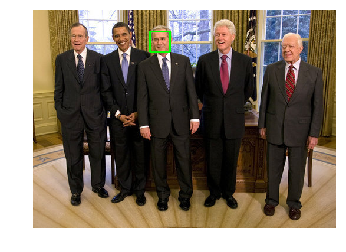

In [9]:
img = read_image("presidents.gif")
img_copy = face_detector_by_cv2(img)
plot_img_by_matplot(img_copy)

### face detection with dlib

Dlib is a C++ machine learning toolkit. There provided lots of APIs to use with Machine Learning and it may be quite interesting to delve into. You can get more information about dlib [here](http://dlib.net/).

Dlib also has some pre-trained classifiers for faces. Here we will use the frontal face detector to detect the faces and the shape predictor to detect the eyes. In order to make the shape predictor work, we need to provide a [face landmarks](https://github.com/ageitgey/face_recognition_models/blob/master/face_recognition_models/models/shape_predictor_68_face_landmarks.dat) file first. We downloaded it from the link and put it under the work directory.

In [10]:
# load the face detector
face_detector = dlib.get_frontal_face_detector()
# load the face landmark file
predictor_path = os.path.join(work_dir, "shape_predictor_68_face_landmarks.dat")
# load the shape detector configured with the face landmark
predictor = dlib.shape_predictor(predictor_path)

# create the range of the points representing 
# the right eye and left eye in the face landmark
RIGHT_EYE_POINTS = list(range(36, 42))
LEFT_EYE_POINTS = list(range(42, 48)) 

The face detection is quite straightforward with the dlib detectors. We again used the face detector first to get the face regions. Then in each face ROI, we used the shape predictor to detect the eyes. Below is the function we wrote.

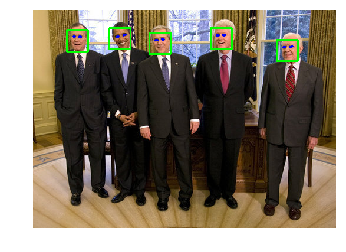

In [11]:
def face_detector_by_dlib(img):
    img_copy = img.copy()
    # get the face ROIs of the image with the face detector
    faces = face_detector(img, 1)
    for face in faces:
        # get the landmark for each face
        landmarks = np.matrix([[p.x, p.y] for p in predictor(img, face).parts()]) 
        # get the region of the left eye
        left_eye = landmarks[LEFT_EYE_POINTS]
        # make a convex hull for the left eye for display
        left_eye_hull = cv2.convexHull(left_eye)
        # get the region of the right eye
        right_eye = landmarks[RIGHT_EYE_POINTS]
        # make a convex hull for the right eye for display
        right_eye_hull = cv2.convexHull(right_eye)
        # mark all the information found
        cv2.rectangle(img_copy, (face.left(), face.top()), (face.right(), face.bottom()), (0,255,0), 2)
        cv2.drawContours(img_copy, [left_eye_hull, right_eye_hull], -1, (255,0,0), 2)
    return img_copy
    
img = read_image("presidents.gif")
img_copy = face_detector_by_dlib(img)
plot_img_by_matplot(img_copy)

From the image above, dlib has a much better detection result than OpenCV. Note that shape predictor provided by dlib is quite powerful, we can use it to detect other face features as well. If you are interested in it, [here](https://www.pyimagesearch.com/2017/04/03/facial-landmarks-dlib-opencv-python/) is a quite good tutorial.

## General object detection with caffe models

Caffe models are the models pre-trained by the researchers and engineers for different tasks with large amounts of data and architectures. These are valuable resources for learning and practicing data science and machine learning algorithms. There are plenty of models in [model zoo](https://github.com/BVLC/caffe/wiki/Model-Zoo), and each has quite a detailed introduction. You can visit there for more information. 

###  object detection with GoogLeNet

Here, we will use GoogLeNet first to do the object detection. GoogLeNet is a 22 layer deep network, which is created by some google researchers. This [paper](https://arxiv.org/abs/1409.4842) here gives a quite detailed introduction to this architecture.

The caffe model we used is available [here](https://github.com/BVLC/caffe/tree/master/models/bvlc_googlenet). We put the model file together with the prototxt file under the GoogLeNet folder in the work directory. The value returned by the googLeNet is an array of the prediction confidence for each labels.  After we get the index of the maximum confidence out from the returned value, we need the synset words to tell us the object label. The synset words for the GoogLeNet can be found [here](https://github.com/torch/tutorials/blob/master/7_imagenet_classification/synset_words.txt).

Note that in order to properly use the caffe models, we need to do some preprocess on the image first, such as regulating the size and normalizing the color base. These demands are included in each caffe model's prototxt file. And in OpenCV, this can be done with [cv2.dnn.blobFromImage()](https://docs.opencv.org/trunk/d6/d0f/group__dnn.html#gac74c39e3a4db141256eb8c94487cba2f).

In [12]:
model_name = "GoogLeNet"
# get the caffe model path
caffe_model_path = os.path.join(work_dir, model_name, "bvlc_googlenet.caffemodel")
# get the prototxt file path
prototxt_path = os.path.join(work_dir, model_name, "deploy.prototxt")
# set the caffe model parameters for cv2.dnn.blobFromImage()
size = (224, 224)
scalefactor = 1
scalar = (104, 117, 123)

# load the synset_words file
with open(os.path.join(work_dir, model_name, "synset_words.txt")) as f:
    classes = list(map(lambda line: ' '.join(line.strip().split()[1:]), f.readlines()))

In [13]:
# the function for object detection with caffe model
def get_detections(img, prototxt_path, caffe_model_path, size, scalefactor, scalar):
    # load the caffe model
    net = cv2.dnn.readNetFromCaffe(prototxt_path, caffe_model_path)
    # create blob for the model
    blob = cv2.dnn.blobFromImage(cv2.resize(img, size), scalefactor, size, scalar)
    net.setInput(blob)
    # get the detection result
    detections = net.forward()
    return detections

Here we used the image of the airplane (which is showed above) to test the classifier, and the output is airliner with a 74.94% confidence.

In [14]:
img = read_image('aircraft.jpg')
detections = get_detections(img, prototxt_path, caffe_model_path, size, scalefactor, scalar)
# get the index of the max prediction over the 1000 synset_words
idx = detections[0].argmax()
# get and predict the best prediction synset word
print(classes[idx], "{:.2f}%".format(detections[0][idx] * 100))

airliner 74.94%


### object detection with MobileNetSSD

The GoogLeNet above is remarkable at image classification, but it cannot localize and classify each element within that image. Also, GoogLeNet may not be the proper solution to the situation where there are multiple objects in the image to be detected.

Region-Convolutional Neural Network (R-CNN) was developed just for such problem. But R-CNN has some practical issues, such that the training is too long while the network is slow during inference time. Luckily, new architectures were developed to address the bottlenet of the R-CNN, and [Single Shot Detector (SSD) MultiBox](https://arxiv.org/abs/1512.02325) is one of the most famous approaches.

Here we will not address too much about how SSD works. There are some very good introductions online, such as this [tutorial](https://towardsdatascience.com/understanding-ssd-multibox-real-time-object-detection-in-deep-learning-495ef744fab). To take a quick look, SSD can help us detect and localize the objects in the image with a quite good speed and accuracy. Here we will use a lightweight pre-trained SSD caffe model -- [MobileNetSSD](https://arxiv.org/abs/1704.04861) to do the object detection. The pre-trained model is available [here](https://github.com/chuanqi305/MobileNet-SSD). And again we should first put the caffe model and the prototxt file under the MobileNetSSD folder in the workspace.

In [15]:
model_name = "MobileNetSSD"
# get the caffe model path
caffe_model_path = os.path.join(work_dir, model_name, "deploy.caffemodel")
# get the prototxt file path
prototxt_path = os.path.join(work_dir, model_name, "deploy.prototxt.txt")
# set the caffe model parameters for blob
size = (300, 300)
scalefactor = 0.007843
scalar = 127.5

# the pre-trained classes of the MobileNetSSD we use
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
           "bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
           "dog", "horse", "motorbike", "person", "pottedplant", "sheep",
           "sofa", "train", "tvmonitor"]
# the random color for each class
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

We wrote another function to mark the detected objects with rectangles. The value returned by the MobileNetSSD is a 2D array, with each row represents one object. The 2D array has seven columns, where the first one indicates the index of the array, the second one shows the index of the class this object belongs to. The third column of the result tells the confidence of the detection and the last four columns shows the rectangle region of the object (left, top, right and bottom respectively).

In [16]:
def mark_detections(img, detections, show_label=False):
    img_copy = img.copy()
    h, w = img.shape[:2]
    for obj in detections[0, 0]:
        # get the index of the class
        idx = int(obj[1])
        # get the confidence of the detection
        confidence = obj[2] * 100
        if confidence > 50:
            # create a label for the detected ROI
            label = "{} {:.2f}%".format(CLASSES[idx], confidence)
            if show_label:
                print(label)
            # get the rectangle information of the ROI
            rec_raw = obj[3:] * (w, h, w, h)
            rec = rec_raw.astype(int)
            # mark the object
            cv2.rectangle(img_copy, (rec[0], rec[1]), (rec[2], rec[3]), COLORS[idx], 2)
            cv2.putText(img_copy, label, (rec[0], rec[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.8, COLORS[idx], 2, cv2.LINE_AA)
    return img_copy


In [17]:
# wrapper function of the detect and mark function
def obj_detector_by_MobileNetSSD(img, show_label=False):
    detections = get_detections(img, prototxt_path, caffe_model_path, size, scalefactor, scalar)
    img_copy = mark_detections(img, detections, show_label)
    return img_copy

Below is the detection of the airplane.

aeroplane 99.67%


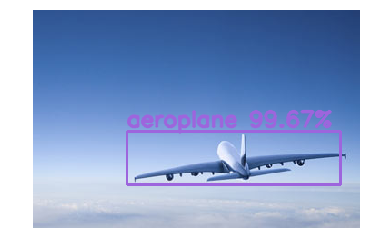

In [18]:
img = read_image("aircraft.jpg")
img_copy = obj_detector_by_MobileNetSSD(img, True)
plot_img_by_matplot(img_copy)

MobileNetSSD has quite a good performance with multi-object detection as well.

cat 96.76%
dog 99.64%


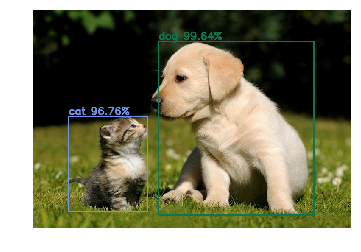

In [19]:
img = read_image("cat_and_dog.jpg")
img_copy = obj_detector_by_MobileNetSSD(img, True)
plot_img_by_matplot(img_copy)

## Realtime application

Finally, with the functions we wrote above, we can try some realtime applications.

We wrote a wrapper function for both the face and object detections here. In the wrapper function, we first got each frame of the given video resource, and then did the detection based on it. The face detection is based on the dlib detector, while the object detection is based on the MobileNetSSD. Note that in order to do the detection fluently with dlib, we have to reduce the size of each frame.

In [20]:
# wrapper function for realtime detection
def realtime_detector(detector, output_name, video_source=0):
    # by default process the video captured by camrea
    # if given the video_source, create the filepath for it
    if video_source:
        video_source = os.path.join(work_dir, "files", video_source)
    # do some configuration on the video parameters for detector
    size, fps, fx, fy = (1280, 720), 5.0, 1.0, 1.0
    # may need to reduce the frame size for dlib
    if detector == face_detector_by_dlib:
        size, fps, fx, fy = (640, 360), 10.0, 0.5, 0.5
    # open the video source
    cap = cv2.VideoCapture(video_source)
    # define the codec and create VideoWriter object to store the process
    fourcc = cv2.VideoWriter_fourcc('m','p','4','v')
    ofn = output_name
    out = cv2.VideoWriter(os.path.join(work_dir, "created", ofn), fourcc, fps, size)
    try:
        while cap.isOpened():
            # get each frame of the video
            _, frame = cap.read()
            # resize the frame if necessary
            frame = cv2.resize(frame, (0,0), fx=fx, fy=fy)
            # do the detection
            frame_copy = detector(frame)
            # store and display the process
            out.write(frame_copy)
            cv2.imshow('frame', frame_copy)
            # press the "q" to quit
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    except:
        pass
    finally:
        # release the resource and close the window
        cap.release()
        out.release()
        cv2.destroyAllWindows()

### realtime face detection with dlib

Let's have fun now! Firstly, we tried the realtime face detection below. For demo here, we used one portion of a public video ([source](https://www.youtube.com/watch?v=OwJPPaEyqhI)), but you can try the camera-based face detection as well.

In [21]:
# uncomment the following code to try the camera based face detection
# realtime_detector(face_detector_by_dlib, "real_face_detection.mp4")

In [22]:
realtime_detector(face_detector_by_dlib, "face_detection.mp4", "face.mp4")

<img src="./object-detection/files/face_detection.gif" align="left">

Overall, the realtime detector works quite well!

### realtime object detection with MobileNetSSD

Then we tried the realtime object detection ([video source](https://www.amoyshare.com/free-video-downloader/?v=dogs%20and%20cats&t=youtube&p=CDwQAA)). But since MobileNetSSD is designed for the application on mobile phones, it sacrifices the accuracy to reduce the use of the memory. So sometimes the detection may not be quite accurate.

In [23]:
realtime_detector(obj_detector_by_MobileNetSSD, "obj_detection.mp4", "cats.mp4")

<img src="./object-detection/files/obj_detection.gif" align="left">

## Reference

1. https://pypi.python.org/pypi/opencv-contrib-python
2. https://docs.opencv.org/3.4.0/d5/de7/tutorial_dnn_googlenet.html
3. https://github.com/BVLC/caffe/tree/master/models/bvlc_googlenet
4. https://github.com/ageitgey/face_recognition_models/blob/master/face_recognition_models/models/shape_predictor_68_face_landmarks.dat
5. http://www.codesofinterest.com/2017/06/wink-detection-using-dlib-and-opencv.html
6. https://docs.opencv.org/3.3.1/d4/d73/tutorial_py_contours_begin.html
7. https://docs.opencv.org/3.1.0/dd/d49/tutorial_py_contour_features.html
8. https://github.com/chuanqi305/MobileNet-SSD
9. https://www.pyimagesearch.com/2017/09/11/object-detection-with-deep-learning-and-opencv/
10. https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_video_display/py_video_display.html
11. https://www.learnopencv.com/speeding-up-dlib-facial-landmark-detector/
12. https://github.com/ipython/ipython/issues/10045
13. https://docs.opencv.org/3.4.1/d7/d8b/tutorial_py_face_detection.html